In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [447]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,9]

In [448]:
data=pd.read_csv('../lectures/data/globalterrorismdb_0617dist.csv', encoding = "ISO-8859-1")

/home/szymon/anaconda3/envs/datascience/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [449]:
pd.options.display.max_rows=8

**1. Plot the number of terrorist accidents each year.**

In [450]:
group_by_year = data.groupby('iyear')

In [451]:
len(group_by_year)

46

In [452]:
sum_years = group_by_year.apply(lambda g: len(g))

In [453]:
sum_years

iyear
1970      651
1971      470
1972      496
1973      473
        ...  
2013    11996
2014    16860
2015    14852
2016    13488
Length: 46, dtype: int64

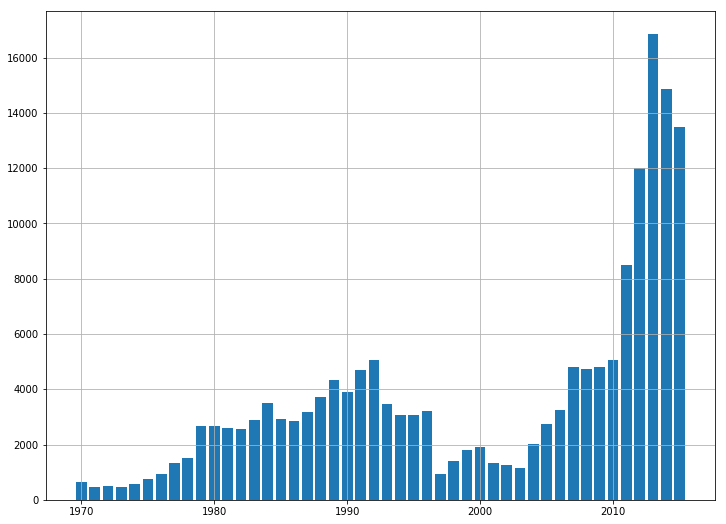

In [454]:
min_year = data['iyear'].argmin()
max_year = data['iyear'].argmax()
min = data.iloc[min_year]
max = data.iloc[max_year]
ind = np.arange(min['iyear'], max['iyear'])
plot = plt.bar(ind, sum_years)
plt.grid()
plt.show()

**2. Make the same plot but split between Americas, Asia, Europe and Africa. Use the stacked bar plot.**

In [455]:
req_data=data[
    ['iyear', 'region']
]

In [456]:
req_data

,iyear,region
0,1970,2
1,1970,1
2,1970,5
3,1970,8
...,...,...
170346,2016,5
170347,2016,11
170348,2016,1
170349,2016,11


**Norh America terrorist attacks count**

In [457]:
america = req_data.loc[req_data['region'].isin(np.arange(1,3))]
america_groupped = america.groupby('iyear')
america_sum = america_groupped.apply(lambda g: len(g))

**Asia terrorist attacks count**

In [458]:
asia = req_data.loc[req_data['region'].isin(np.arange(4, 7))]
asia_groupped = asia.groupby('iyear')
asia_sum = asia_groupped.apply(lambda g: len(g))

**Europe terrorist attacks**

In [459]:
europe = req_data.loc[req_data['region'].isin(np.arange(8,9))]
europe_groupped = europe.groupby('iyear')
europe_sum = europe_groupped.apply(lambda g: len(g))

**Africa terrorist attacks**

In [460]:
africa = req_data.loc[req_data['region'].isin(np.arange(10,11))]
africa_groupped = africa.groupby('iyear')
africa_sum = africa_groupped.apply(lambda g: len(g))

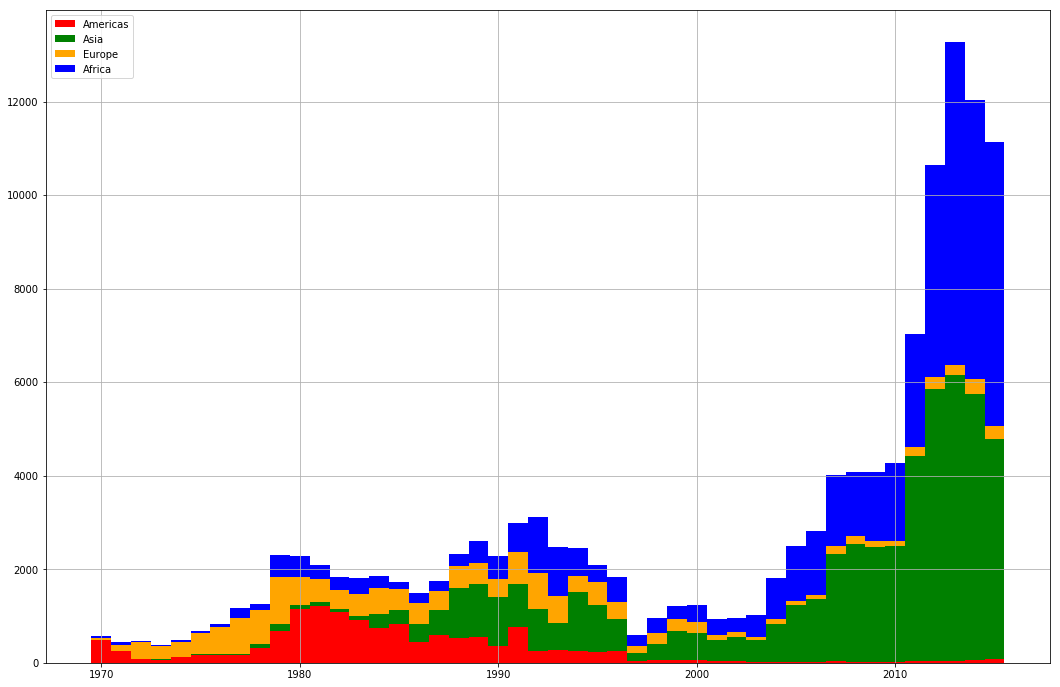

In [462]:
plt.rcParams["figure.figsize"] = [18,12]

width = 1.0
america_plot = plt.bar(ind, america_sum, width, color='red')
asia_plot = plt.bar(ind, asia_sum, width, bottom=america_sum, color='green')
europe_plot = plt.bar(ind, europe_sum, width, bottom=america_sum+asia_sum, color='orange')
africa_plot = plt.bar(ind, africa_sum, width, bottom=america_sum+asia_sum+europe_sum, color='blue')

plt.legend((america_plot[0], asia_plot[0], europe_plot[0], africa_plot[0]), ('Americas', 'Asia', 'Europe', 'Africa'))
plt.grid()
plt.show()